In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [9]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [10]:
sale_price = data['Sale_Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


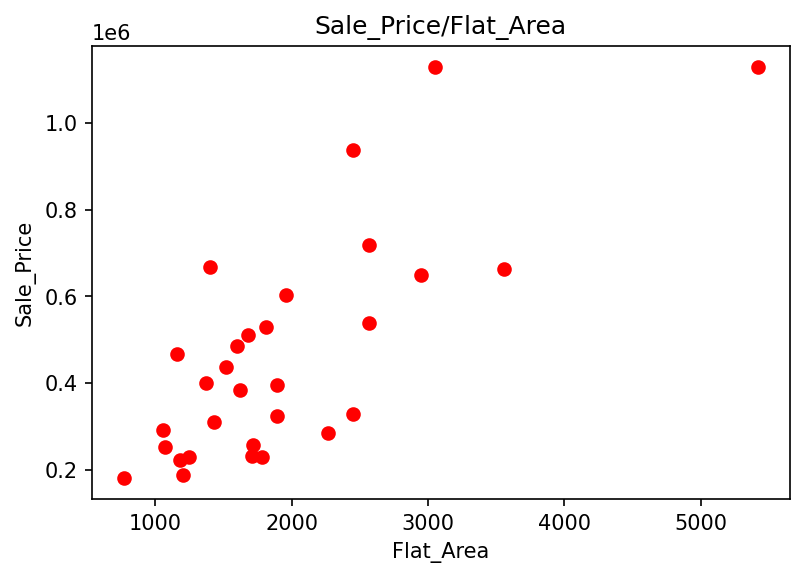

In [23]:
plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.show()

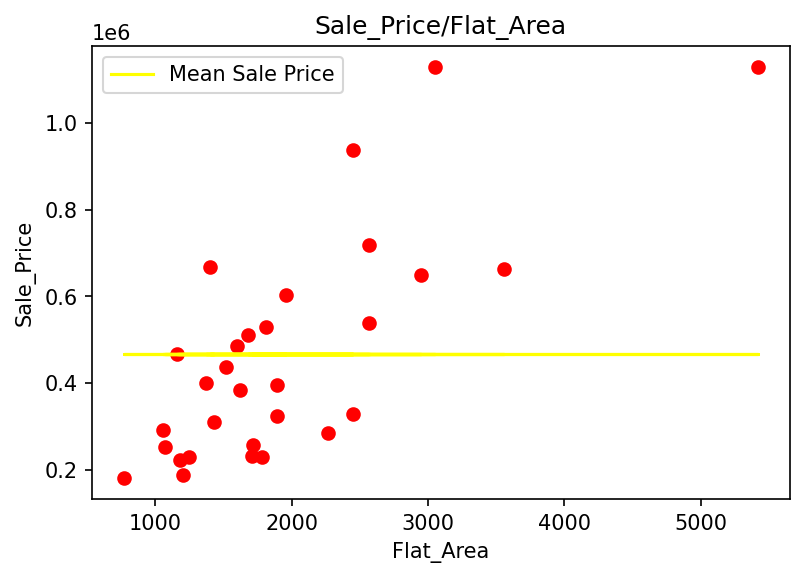

In [24]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price  , color = 'yellow', label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Sale_Price/Flat_Area')
plt.legend()
plt.show()

In [3]:
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'Slope 0with MSE 281372081125.0')

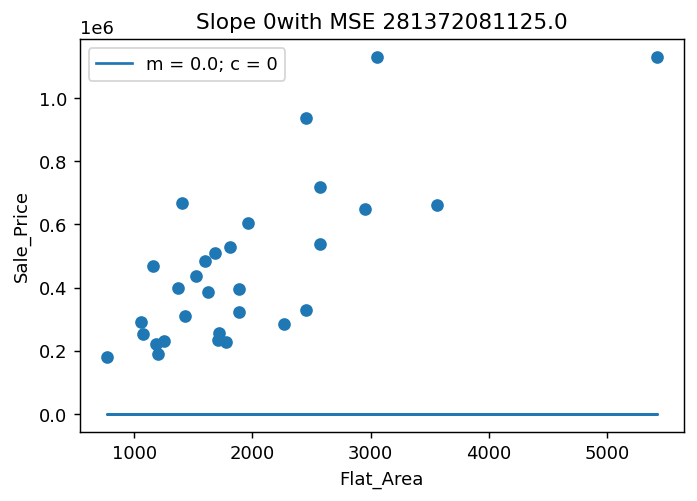

In [39]:
c = 0
m = 0
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mean_squared_error(sample_data.sale_price, line)
plt.title("Slope "+str(m)+"with MSE "+str(MSE))

Text(0.5, 1.0, 'Slope 50with MSE 184728400708.33334')

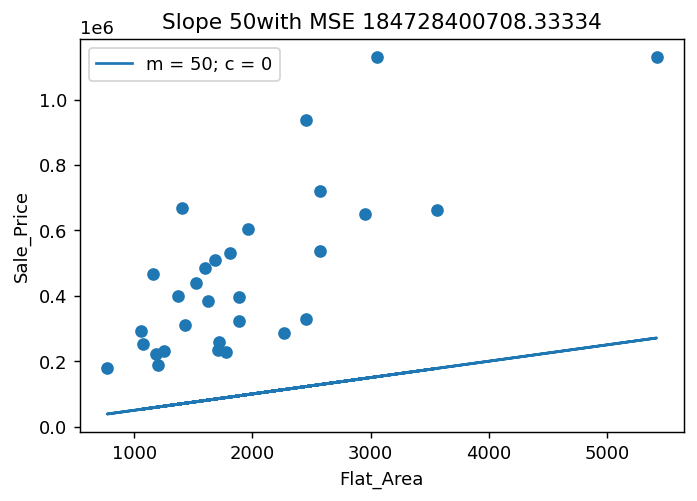

In [40]:
c = 0
m = 50
line = []
for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)
    
plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mean_squared_error(sample_data.sale_price, line)
plt.title("Slope "+str(m)+"with MSE "+str(MSE))

In [15]:
def slope_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [16]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

In [17]:
# Arranging in Dataframe
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


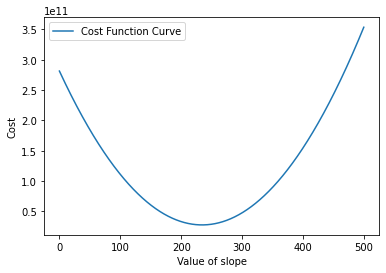

In [44]:
# Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [27]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [5]:
def intercept_Error(slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
        
    MSE = mean_squared_error(sample_data.sale_price, sale)
    return MSE

In [21]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept:
    cost = intercept_Error(slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [22]:
# Arranging in Dataframe
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.tail()

,intercept,Cost
44995,49995,2.929862e+10
44996,49996,2.929870e+10
44997,49997,2.929878e+10
44998,49998,2.929886e+10
44999,49999,2.929894e+10


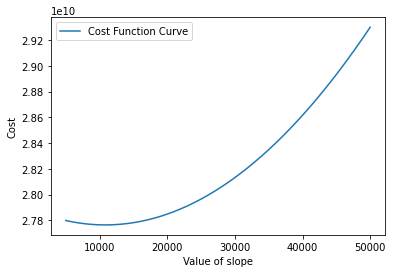

In [23]:
# Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [24]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error(slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [25]:
# Arranging in Dataframe
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


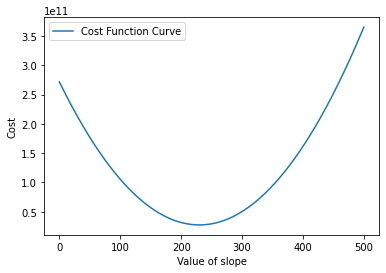

In [26]:
# Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [28]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [29]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept:
    cost = intercept_Error(slope = 229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [30]:
# Arranging in Dataframe
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.tail()

,intercept,Cost
44995,49995,2.855987e+10
44996,49996,2.855993e+10
44997,49997,2.855999e+10
44998,49998,2.856005e+10
44999,49999,2.856011e+10


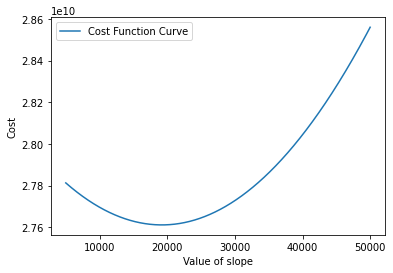

In [31]:
# Plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [32]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199